## Observations and Insights

## Dependencies and starter code

In [147]:
# Dependencies and Setup
import os 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
research_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#Change index to Drug Regimen
#research_df = research_df.groupby("Drug Regimen")
research_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Grouped_research_df = research_df.groupby(['Drug Regimen'])

print(Grouped_research_df)
Grouped_research_df.count().head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [149]:
Sites_Counts = Grouped_research_df["Metastatic Sites"].value_counts()
Sites_Counts.head()

Drug Regimen  Metastatic Sites
Capomulin     0                   118
              1                    67
              2                    38
              3                     7
Ceftamin      0                    67
Name: Metastatic Sites, dtype: int64

In [150]:
#Data integrity checck using field counts
Mean_Vol = Grouped_research_df["Tumor Volume (mm3)"].mean()
Med_Vol = Grouped_research_df['Tumor Volume (mm3)'].median()
Var_Vol = Grouped_research_df['Tumor Volume (mm3)'].var()
STD_Vol = Grouped_research_df['Tumor Volume (mm3)'].std()
SEM_Vol = Grouped_research_df['Tumor Volume (mm3)'].sem()
Total_Vol = Grouped_research_df['Tumor Volume (mm3)'].sum()
Total_Sites = Grouped_research_df['Metastatic Sites'].count()
Total_Weight = Grouped_research_df['Weight (g)'].sum()
Summary_ofRegimen_df = pd.DataFrame({"Mean Tumor Volume": Mean_Vol,
                                     "Median Tumor Volume": Med_Vol,
                                     "Tumor Volume Variance": Var_Vol,
                                     "Tumor Volume Std.": STD_Vol,
                                     "Volume Standard Error": SEM_Vol,
                                     "Total Volume": Total_Vol,
                                     "Total Metastatic Sites": Total_Sites,
                                     "Total Weight": Total_Weight})
Summary_ofRegimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.,Volume Standard Error,Total Volume,Total Metastatic Sites,Total Weight
Drug Regimen,,,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,9355.420462,230,4592
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,9361.228582,178,4877
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,9413.493529,178,4841
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,10384.299876,188,5238
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,10105.671026,186,5053
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,9780.078122,181,5055
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,8423.930878,161,4354
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,9169.417875,228,4487
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,9816.199991,181,5042


## Bar plots

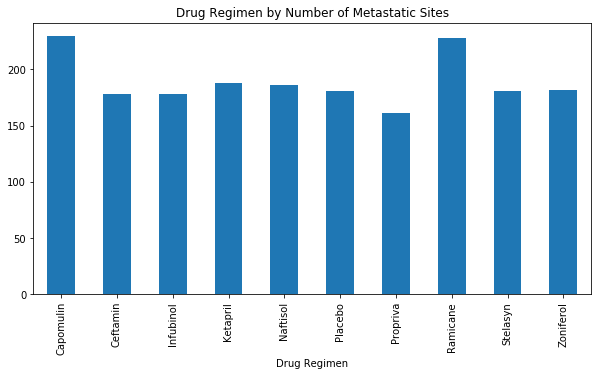

<Figure size 432x288 with 0 Axes>

In [151]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Filter the DataFrame down only to those columns to chart
Drug_by_DataPoints = Grouped_research_df.count()["Metastatic Sites"]

# Set the index to be "State" so they will be used as labels
#Drug_by_DataPoints = Drug_by_DataPoints.set_index("Drug Regimen")

Drug_by_DataPoints.head()
# Use DataFrame.plot() in order to create a bar chart of the data
Drug_by_DataPoints.plot(kind="bar", figsize=(10,5))

# Set a title for the chart
plt.title("Drug Regimen by Number of Metastatic Sites")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Counts')

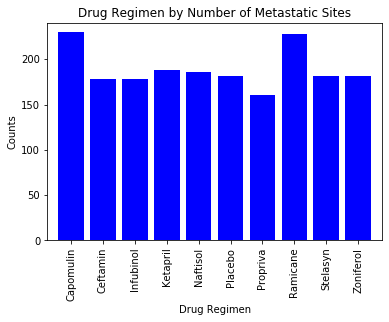

In [152]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Drug regimen list for x axis 
points = Drug_by_DataPoints

# Set x axis to drug regimens
x_axis = np.arange(len(Drug_by_DataPoints))

# plot bar graph with red showing differening pylot version
plt.bar(x_axis, points, color="b", alpha=1, align="center")

# set tick locations to the drug regimens
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
                           'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')
# plot formatting 
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(points)+10)
plt.title("Drug Regimen by Number of Metastatic Sites")
plt.xlabel("Drug Regimen")
plt.ylabel("Counts")

## Pie plots

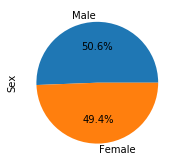

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Gender_Chart = research_df["Sex"].value_counts().plot.pie()
ax1 = plt.subplot(121, aspect='equal')
Gender_Chart = research_df["Sex"].value_counts().plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x23024a32688>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

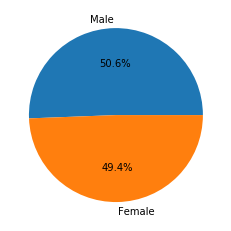

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(research_df["Sex"].value_counts(),autopct='%1.1f%%', labels=["Male","Female"] )

## Quartiles, outliers and boxplots

In [155]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Caculate the IQR and quantitatively determine if there are any potential outliers.

#Capomulin: IQR and quantitatively
capo_df = research_df.loc[research_df["Drug Regimen"] == "Capomulin",:]
index_final = capo_df.groupby('Mouse ID').max()['Timepoint']
capo_df_merged = pd.DataFrame(index_final)
capo_df_merged = pd.merge(capo_df, capo_df_merged, on=("Mouse ID","Timepoint"),how="right")
capo_vol = capo_df_merged["Tumor Volume (mm3)"]

quartiles = capo_vol.quantile([.25,.5,.75])
lower_qrt = quartiles[0.25]
upper_qrt = quartiles[0.75]
iqr = upper_qrt-lower_qrt

lower_bound = lower_qrt - (1.5*iqr)
upper_bound = upper_qrt + (1.5*iqr)
print(f"Capomulin potential tumor volume outliers could fall below {lower_bound} or above {upper_bound}")

#Ramicane: IQR and quantitatively
rami_df = research_df.loc[research_df["Drug Regimen"] == "Ramicane", :]
index_final = rami_df.groupby('Mouse ID').max()['Timepoint']
rami_df_merged = pd.DataFrame(index_final)
rami_df_merged = pd.merge(rami_df, rami_df_merged, on=("Mouse ID","Timepoint"),how="right")
rami_vol = rami_df_merged["Tumor Volume (mm3)"]

quartiles = rami_vol.quantile([.25,.5,.75])
lower_qrt = quartiles[0.25]
upper_qrt = quartiles[0.75]
iqr = upper_qrt-lower_qrt

lower_bound = lower_qrt - (1.5*iqr)
upper_bound = upper_qrt + (1.5*iqr)
print(f"Ramicane potential tumor volume outliers could fall below {lower_bound} or above {upper_bound}")

#Infubinol:  IQR and quantitatively
Infu_df = research_df.loc[research_df["Drug Regimen"] == "Infubinol", :]
index_final = Infu_df.groupby('Mouse ID').max()['Timepoint']
Infu_df_merged = pd.DataFrame(index_final)
Infu_df_merged = pd.merge(Infu_df, Infu_df_merged, on=("Mouse ID","Timepoint"),how="right")
Infu_vol = Infu_df_merged["Tumor Volume (mm3)"]

quartiles = Infu_vol.quantile([.25,.5,.75])
lower_qrt = quartiles[0.25]
upper_qrt = quartiles[0.75]
iqr = upper_qrt-lower_qrt

lower_bound = lower_qrt - (1.5*iqr)
upper_bound = upper_qrt + (1.5*iqr)
print(f"Infubinol potential tumor volume outliers could fall below {lower_bound} or above {upper_bound}")

#Ceftamin:  IQR and quantitatively
Ceft_df = research_df.loc[research_df["Drug Regimen"] == "Ceftamin", :]
index_final = Ceft_df.groupby('Mouse ID').max()['Timepoint']
Ceft_df_merged = pd.DataFrame(index_final)
Ceft_df_merged = pd.merge(Ceft_df, Ceft_df_merged, on=("Mouse ID","Timepoint"))
Ceft_vol = Ceft_df_merged["Tumor Volume (mm3)"]

quartiles = Ceft_vol.quantile([.25,.5,.75])
lower_qrt = quartiles[0.25]
upper_qrt = quartiles[0.75]
iqr = upper_qrt-lower_qrt

lower_bound = lower_qrt - (1.5*iqr)
upper_bound = upper_qrt + (1.5*iqr)
print(f"Ceftamin potential tumor volume outliers could fall below {lower_bound} or above {upper_bound}")


Capomulin potential tumor volume outliers could fall below 20.70456164999999 or above 51.83201549
Ramicane potential tumor volume outliers could fall below 17.912664470000003 or above 54.30681135
Infubinol potential tumor volume outliers could fall below 36.83290494999999 or above 82.74144559000001
Ceftamin potential tumor volume outliers could fall below 25.355449580000002 or above 87.66645829999999


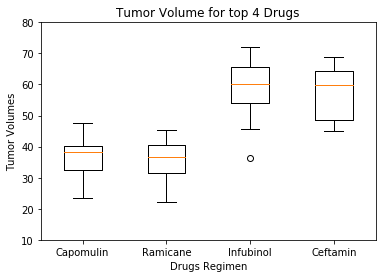

In [156]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Select data for the top four perferming drug regimen
top_drugs = research_df[research_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_drugs = top_drugs.sort_values(["Timepoint"], ascending=True)
top_drugs

top_drugs_data = top_drugs[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

top_drugs_data
# Arrange data in preparations to for box plot for  across top four regimens 
sorted_top_drugs = top_drugs_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

# Convert sorted data into dataframe to easily manipulate
most_promise_df = sorted_top_drugs.to_frame()
most_promise_df

#Top four drug regiment list
Top_List = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
topdrug_df = most_promise_df.reset_index()
regimen_dist = topdrug_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
regimen_dist = pd.DataFrame(regimen_dist)
regimen_dist = regimen_dist.reindex(Top_List)
regimen_vols = [vol for vol in regimen_dist['Tumor Volume (mm3)']]
plt.boxplot(regimen_vols, labels=Top_List)
plt.ylim(10, 80)
plt.title("Tumor Volume for top 4 Drugs")
plt.ylabel("Tumor Volumes")
plt.xlabel("Drugs Regimen")
plt.show()

## Line and scatter plots

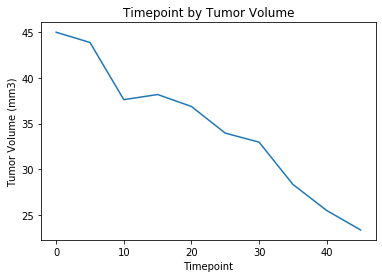

In [157]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_df = research_df.loc[research_df["Drug Regimen"] == "Capomulin"]
mouse_data = mouse_df.loc[mouse_df["Mouse ID"]== "s185"]
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)']);
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Timepoint by Tumor Volume")
plt.show()

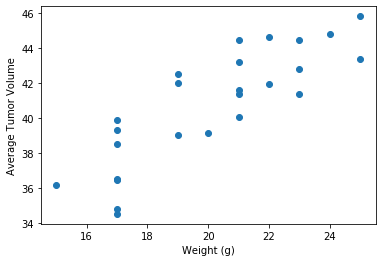

In [158]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_only_df = research_df.loc[research_df["Drug Regimen"] == "Capomulin",:]
capo_avg_df = capo_only_df.groupby(['Mouse ID']).mean()# Compute an averaged df; all fields may not make sense
plt.scatter(capo_avg_df['Weight (g)'],capo_avg_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')

plt.savefig('Mean Tumor Vol vs Weight')
plt.show()


The r-squared is: 0.8419363424694718


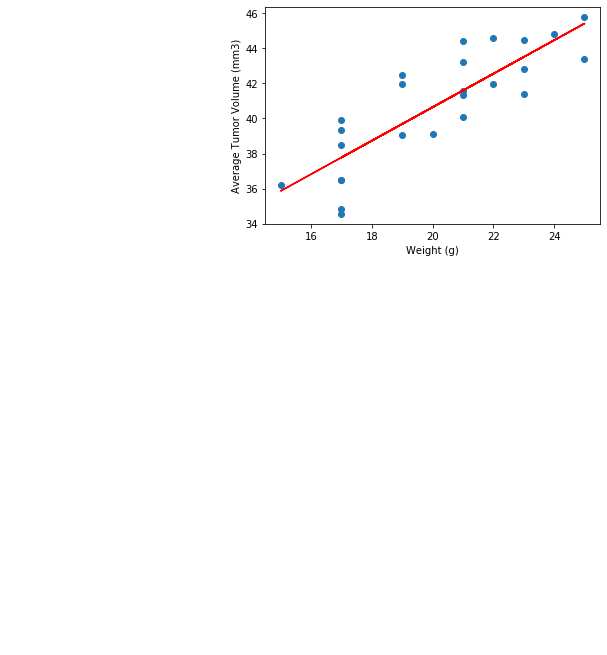

In [159]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
x_values = capo_avg_df['Weight (g)']
y_values = capo_avg_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
bestfit_values = x_values * slope + intercept
linear_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,bestfit_values,"r-")
plt.annotate(linear_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")
plt.savefig('Avg Tumor Vol vs Weight-Capomulin w regression')
plt.show()